# Logistic Regression
Building a cat classifier using Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image

In [6]:
train_dataset = h5py.File('training.h5', "r")                   # training set
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('test.h5', "r")                        # test set
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:]) 

classes = np.array(test_dataset["list_classes"][:])             # the list of classes

train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(1, 209)


In [8]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [9]:
train_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T / 255.              # reshaping, standardizing
test_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255.

In [10]:
def sigmoid(z):                                     # sigmoid(z) = 1 / (1+e^(-z))
    return 1/(1+np.exp(-z))

In [11]:
def initialize_with_zeros(dim):
    return np.zeros((dim,1)),0.

In [12]:
def propagate(w, b, X, Y):

    m = X.shape[1]

    A = sigmoid (np.dot(w.T,X) + b)
    cost = np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))*(-1/m)       # logistic regression cost function : Average over training examples,
                                                                # of - y*log(a) - (1-y)*log(1-a)

    dw = np.dot(X,(A-Y).T)/m                                    # delJ / delw
    db = np.sum(A-Y)/m
    
    return dw, db, np.squeeze(np.array(cost))

In [13]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

    costs = []
    
    for i in range(num_iterations):

        dw, db, cost = propagate(w,b,X,Y)    

        w = w - learning_rate*dw
        b = b - learning_rate*db

        if i % 100 == 0:
            costs.append(cost)
    
    return w, b, dw, db, costs

In [14]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
 
    A = sigmoid (np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] > 0.5 :               # > 0.5 implies y=1
            Y_prediction[0,i] = 1
        else :                          # <= 0.5 (y=0)
            Y_prediction[0,i] = 0
    
    return Y_prediction

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):

    w, b = initialize_with_zeros(X_train.shape[0])
    w, b, dw, db, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    return  costs, Y_prediction_test, Y_prediction_train, w, b, learning_rate, num_iterations

In [17]:
costs, Y_prediction_test, Y_prediction_train, w, b, learning_rate, num_iterations = model(train_x, train_set_y, test_x, test_set_y, 2000, 0.005, True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


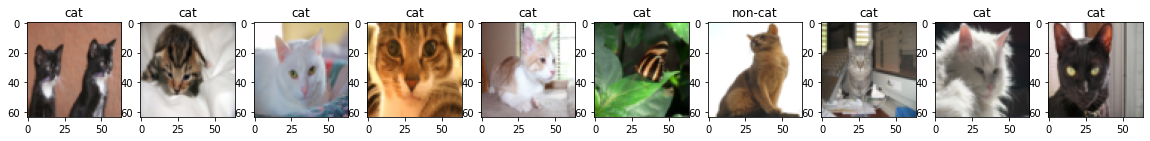

In [18]:
# test set

indices = range(10)
fig = plt.figure (figsize=(len(indices)*2,5))

rows, columns = 1, len(indices)

for index in indices:
    fig.add_subplot(rows,columns,index+1)
    plt.imshow(test_x[:, index].reshape((num_px, num_px, 3)))
    plt.title(classes[int(Y_prediction_test[0,index])].decode("utf-8"))

Text(0.5, 1.0, 'cat')

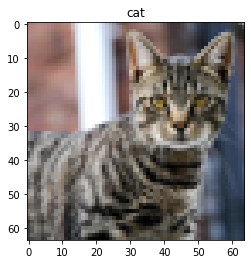

In [20]:
# test with custom image

my_image = "test_image.jpg"   

image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)

image = image.reshape((1, num_px * num_px * 3)).T / 255.
my_predicted_image = predict(w, b, image)

plt.title(classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))